<a href="https://colab.research.google.com/github/prishanmu/She-Ra/blob/master/Bow_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from collections import Counter
import nltk
import string
import itertools
import collections
from os import path
from PIL import Image

In [3]:
import re
import os
import csv


list_of_lines = []

#####
### for each file in "TV Show Scripts in TXT"
#####

import os
your_path = 'TV Show Scripts in TXT/'
files = os.listdir(your_path)
#keyword = 'your_keyword'
for file in files:
    s = file[0]
    e = file[1]+file[2]
    f = open(os.path.join(your_path+ file), 'r', encoding="utf8")### Open txt file to read as string
    for line in f:
        line = line.strip()
        line = re.sub("[\(\[].*?[\)\]]", "", line) ## delete any words inbetween "[" and "]": re.sub("[\(\[].*?[\)\]]", "", string)
        line = line.split(":") ##split lines by character and dialouge
        line.append(s)
        line.append(e)
        list_of_lines.append(line)


    f.close()
#####
### close txt file
#####
final_list = []
for line in list_of_lines:
    if len(line) ==4:
        final_list.append(line)

print(final_list)


#####
### open CSV file to write
#####

with open('she_ra_dialogue.csv','w', encoding="utf8") as f:
    writer = csv.writer(f)
    writer.writerow(['character','dialogue', 'season', 'episode']) # define CSV header
    writer.writerows(final_list) # feed list_of_lines to CSV file

f.close()
#####
### close CSV file
#####


[['Catra', ' The cities forces have all fled. Dryl is ours.', '2', '02'], ['Scorpia', " All right. I mean I guess it, kind of, was already ours since they're Princess is on our side and all, but the banners, they really make it feei official.", '2', '02'], ['Catra', ' Where are you?', '2', '02'], ['Scorpia', ' That is a great question and the answer is "I do not know". Yea, this place is some kind of maze.', '2', '02'], ['Catra', "  There. That's me. Follow it out when you're done. And hurry up we have work to do.", '2', '02'], ['Adora', ' Whewh, getting pretty good huh?', '2', '02'], ['Light Hope', ' You have shown improvement. But your attack would have been 57% more effective if you had support from your steed. It is time to bring Swift Wind into your training.', '2', '02'], ['Adora', " Um, shouldn't I work on mastering my own abilities first?", '2', '02'], ['Light Hope', ' As She-Ra, your sacred connection with your steed is as important as any of your physical abilities. He is a p

In [4]:
df = pd.read_csv("she_ra_dialogue.csv")
df = df[df.dialogue!=' ']
df.dialogue.astype('str')
df.head()

,character,dialogue,season,episode
0,Catra,The cities forces have all fled. Dryl is ours.,2,2
1,Scorpia,"All right. I mean I guess it, kind of, was al...",2,2
2,Catra,Where are you?,2,2
3,Scorpia,"That is a great question and the answer is ""I...",2,2
4,Catra,There. That's me. Follow it out when you're ...,2,2


In [54]:
bow = df[(df.character == 'Bow') & (df.season == 5)]
bow_text = str(bow.dialogue.values)
bow_text = bow_text.lower()

In [55]:
stopwords = set(STOPWORDS)
stopwords.add('uh')
stopwords.add('oh')
stopwords.add('okay')
stopwords.add('really')
stopwords.add('one')
stopwords.add('yeah')
mask = np.array(Image.open(path.join("/content/she-ra-bow.jpg")))


wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords, mask = mask)

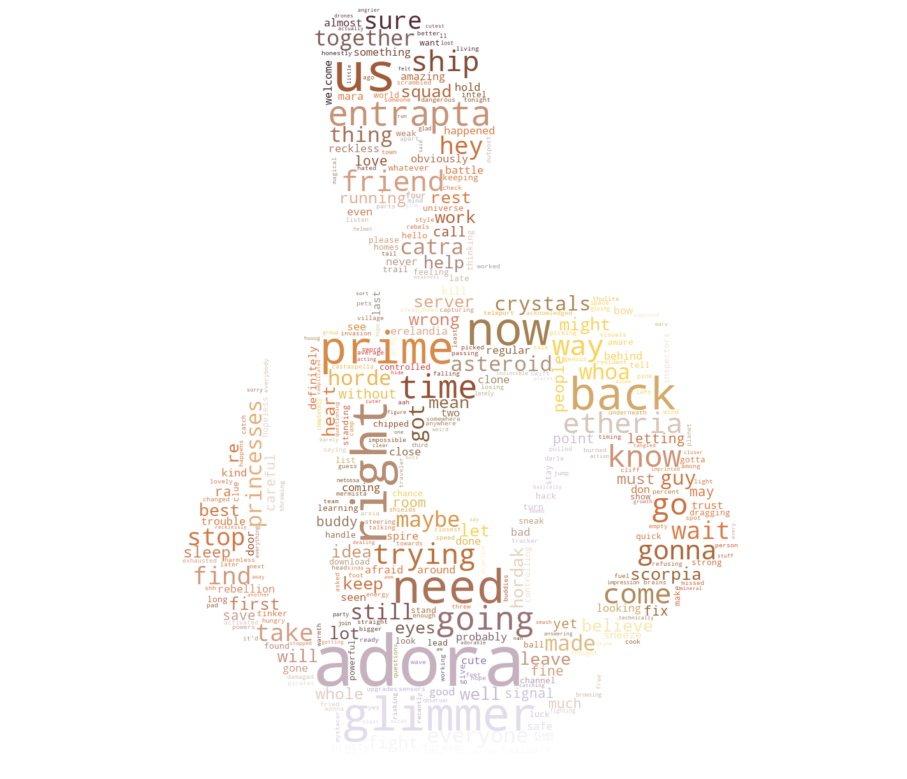

In [56]:
image_colors = ImageColorGenerator(mask)

wordcloud = wc.generate(bow_text)

plt.figure(figsize=(16,20))

plt.imshow(wordcloud)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()